# Machine Learning - Laboratory 2

In [1]:
import getopt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from pdffuns import *

In [2]:
def labsol2(my, Sgm, Pw, discr='pxw'):

    # Initialise values
    x1 = np.arange(-10,10.5,0.5).reshape(-1,1)
    x2 = np.arange(-10,10.5,0.5).reshape(-1,1)
    
    # Get coordinates grid
    X1, X2 = np.meshgrid(x1, x2)

    # Pack everything
    X = np.dstack((X1, X2))

    # Determine class specific probability density functions, pxw[i], i = 0,...,M-1
    M = my.shape[0]
    # - initialise pxw as empty list
    pxw = np.empty(shape=(M, X.shape[0], X.shape[1]))
    # - initialise total density function, px as zero
    px = 0
    for i in range(M):
        pxw[i] = norm2D(my[i], Sgm[i], X)
        px = px + Pw[i] * pxw[i]

    # Determine discriminant functions, g[i], i = 0,...,M-1
    g = np.empty(shape=(M, X.shape[0], X.shape[1])) # - initialise g as empty list
    # - iterate over classes, i = 0,...,M-1
    for i in range(M):
        #    - on condition of discr determine selected discriminant function
        if discr=='s_pxw':
            # - Scaled pdfs
            g[i] = Pw[i] * pxw[i]
        elif discr=='pp':
            # - Posterior probability
            g[i] = (Pw[i] * pxw[i]) / px
        elif discr=='pxw':
            # - pdfs (not really discriminant functions)
            g[i] = pxw[i]
    
    return x1, x2, g

# Sections a) and b)

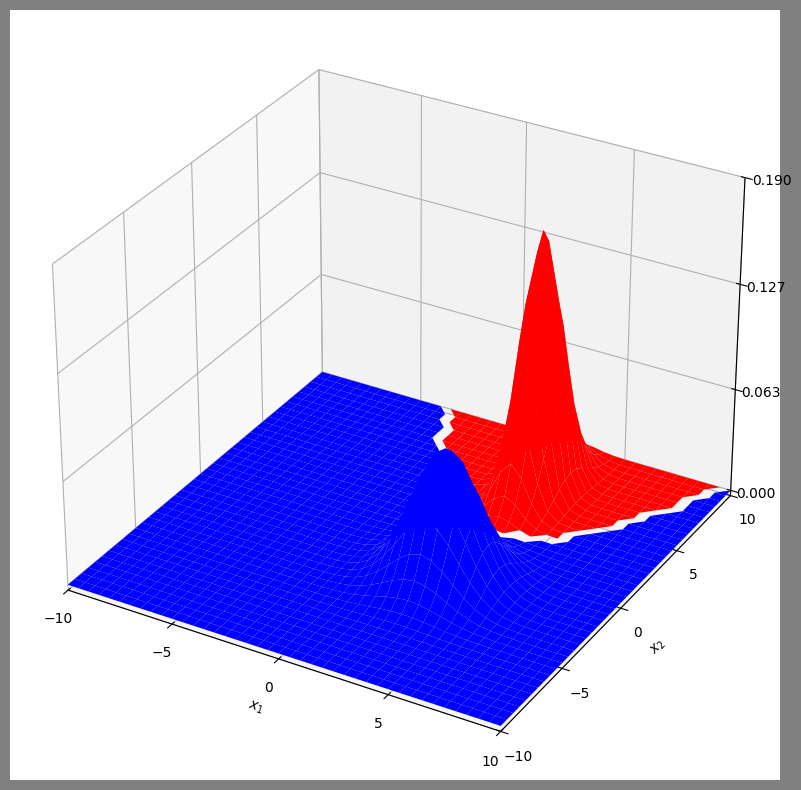

In [3]:
# labsol2() uses the norm2D function to compute the discriminant function

# Define parameters
my = np.array([ [[3], [6]], [[3], [-2]] ])
Sgm = np.array([ [[0.5, 0], [0, 2]], [[2, 0], [0, 2]] ])    
Pw = np.array([0.5, 0.5])

# Choose a discriminant function:
    # pxw --> Class-conditional PDF
    # pp --> Posterior probability
    # s_pxw --> Scaled PDF
    
x1, x2, g = labsol2(my, Sgm, Pw, 'pxw') # Generate discriminant functions
classplot(g, x1, x2, 1, gsv={'gsv': 1, 'figstr': 'pdf'})    # Plot both discriminant functions

# Section c)

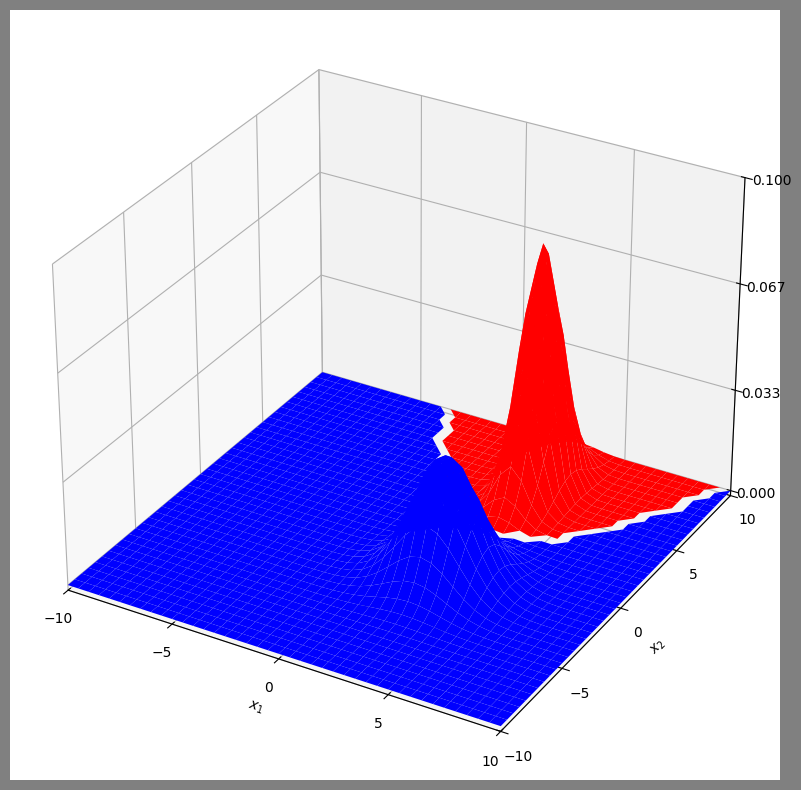

In [4]:
x1, x2, g = labsol2(my, Sgm, Pw, 's_pxw') # We use s_pdf this time to get the scaled pdf (Pw*pxw)
classplot(g, x1, x2, 1, gsv={'gsv': 1, 'figstr': 's_pdf'})    # Plot both discriminant functions

# Section d)

The decision boundary is defined as $g_i(x) = g_j(x)$, in other words, those points were the value of $g_i$ is the same as $g_j$.\
We can see in the figures above the white line between both regions is the points were the functions have similar values.

# Section e)

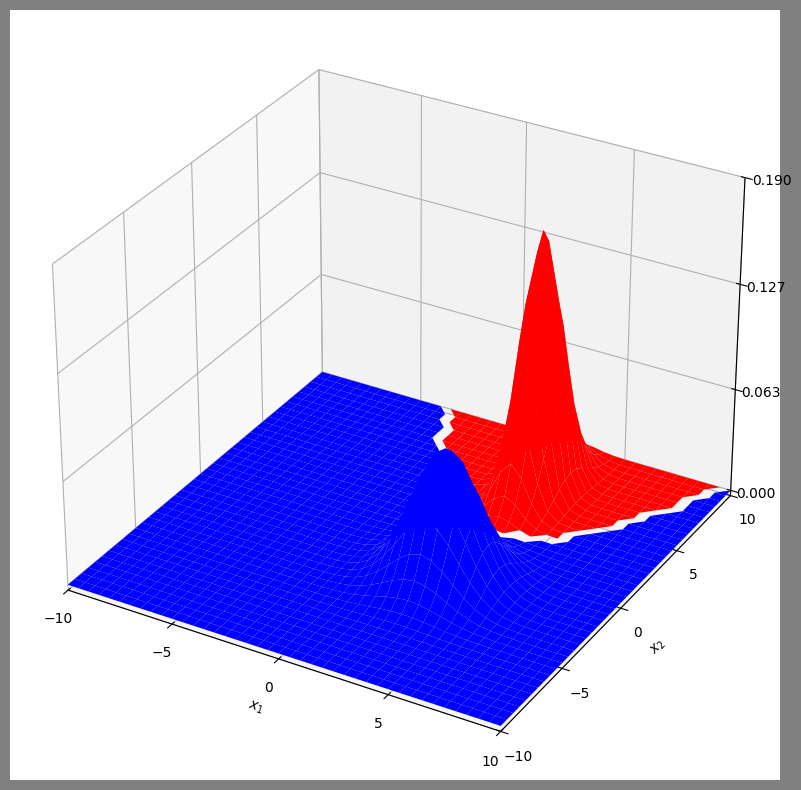

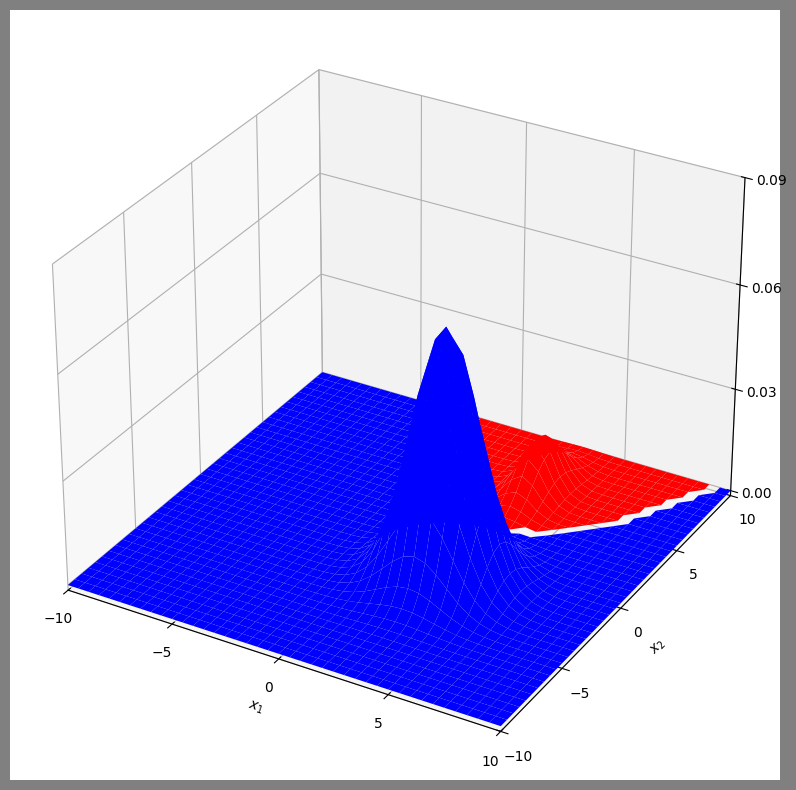

In [5]:
# Define the new priori probabilities
Pw = np.array([0.1, 0.9])
    
x1, x2, g = labsol2(my, Sgm, Pw, 'pxw') # Generate discriminant functions
classplot(g, x1, x2, 1)    # Plot both discriminant functions

x1, x2, g = labsol2(my, Sgm, Pw, 's_pxw') # Generate discriminant functions
classplot(g, x1, x2, 1)    # Plot both discriminant functions

We can notice that the __PDF__ remains the same while the scaled __PDF__ seems very different, this is due to the direct dependence of the scaled __PDF__ on the prior probabilities: $g(x) = P(w)*p(x|w)$.

# Section f)

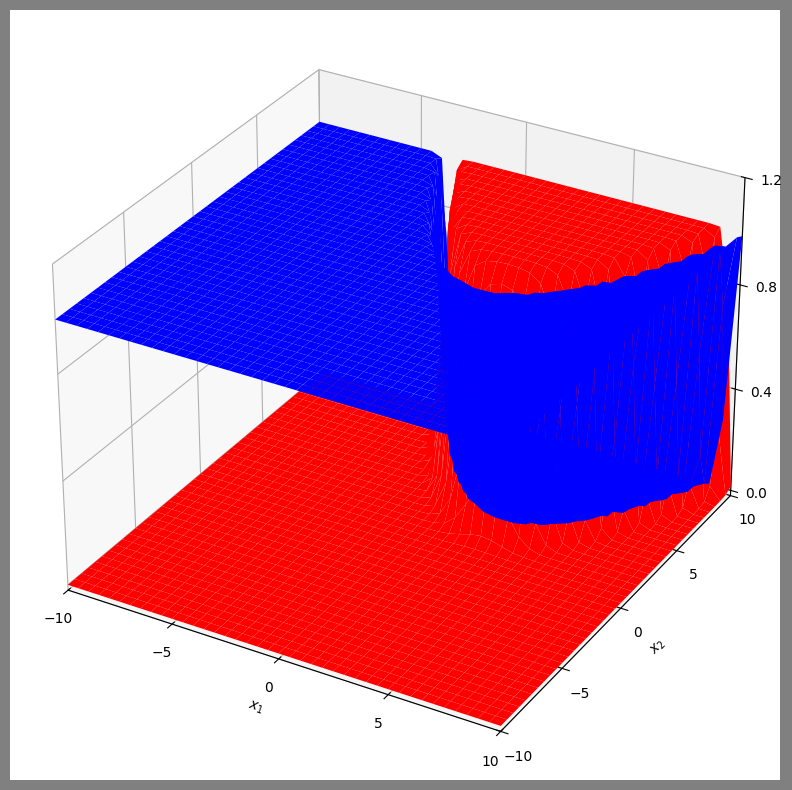

In [6]:
# Restore priori probabilities
Pw = np.array([0.5, 0.5])
    
x1, x2, g = labsol2(my, Sgm, Pw, 'pp') # Generate discriminant functions
classplot(g, x1, x2, 0)    # Plot both discriminant functions

### Student information
Antón Maestre Gómez\
282320@uis.no

Daniel Linfon Ye Liu\
282347@uis.no